In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify as sqrf 
import mplcyberpunk
from datetime import datetime
plt.style.use("cyberpunk")

In [8]:
df = pd.read_csv(r"C:\Users\Administrator\Desktop\Personal Projects\Coffee Shop project\Coffee_Shop_cleaned.csv")
df.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,product_category,product_type,product_detail,size,hour,total_sales,month_name,day_name
0,114301,2023-06-01,11:33:29 AM,3,Astoria,45,1,3.0,Tea,Brewed herbal tea,Peppermint,Large,11,3.0,Jun-2023,Thursday
1,115405,2023-06-02,11:18:24 AM,3,Astoria,45,1,3.0,Tea,Brewed herbal tea,Peppermint,Large,11,3.0,Jun-2023,Friday
2,115478,2023-06-02,12:02:45 PM,3,Astoria,45,1,3.0,Tea,Brewed herbal tea,Peppermint,Large,12,3.0,Jun-2023,Friday
3,116288,2023-06-02,07:39:47 PM,3,Astoria,45,1,3.0,Tea,Brewed herbal tea,Peppermint,Large,19,3.0,Jun-2023,Friday
4,116714,2023-06-03,12:24:57 PM,3,Astoria,45,1,3.0,Tea,Brewed herbal tea,Peppermint,Large,12,3.0,Jun-2023,Saturday


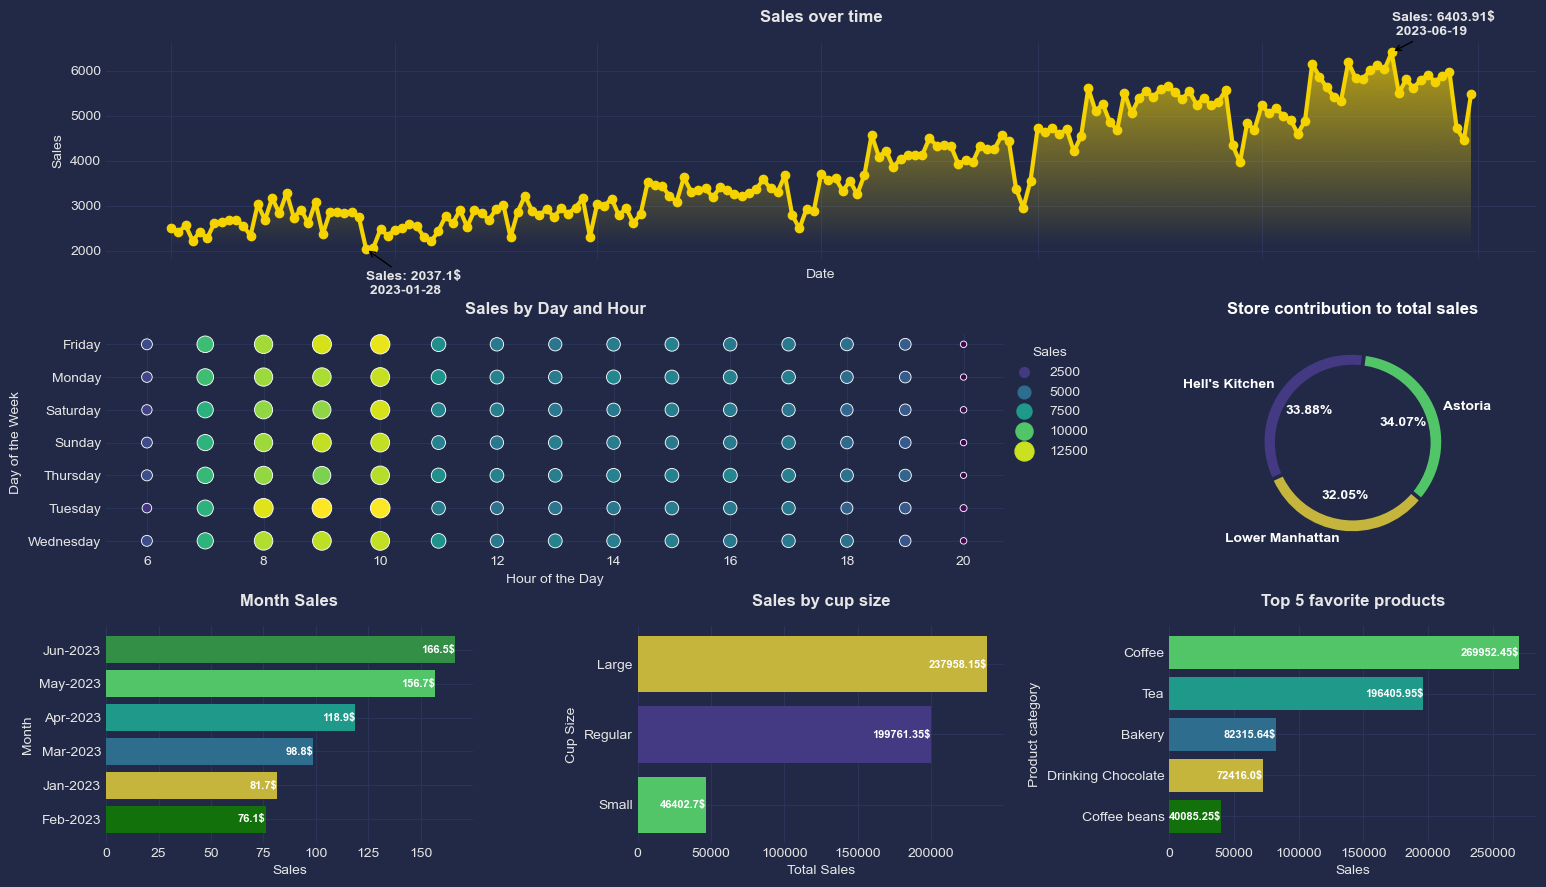

In [29]:
def rename_days(day):
    if day == 'Monday':
        return 'Mon'
    elif day == 'Tuesday':
        return 'Tue'
    elif day == 'Wednesday':
        return 'Wed'
    elif day == 'Thursday':
        return 'Thu'
    elif day == 'Friday':
        return 'Fri'
    elif day == 'Saturday':
        return 'Sat'
    elif day == 'Sunday':
        return 'Sun'

def custom_autopct(pct):
    return f'{pct:.2f}%' 

explode_donut_chart = (0.025, 0.025, 0.025)
colors=["#12710A","#C5B53C","#2E6D8E","#1F9989",'#52C569','#338F45']
cols = ["#52C569","#443983","#C5B53C"] 
labels_colors= 'white'
labels_size = 8
title_fontweight = 'bold'

plots_without_axis = [(0, 0), (0,1), (0,2), (1, 0), (1,1)]  # Example: specify which subplots to remove axis labels from

fig, axs = plt.subplots(3, 3, figsize=(13, 10))

# Flatten the axs array
axs_flat = axs.flatten()

for i, ax in enumerate(axs_flat):
    if (i // 3, i % 3) in plots_without_axis:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])


#### 1st row of dash ####

#Sales over time
df_sales_over_time = df.groupby('transaction_date')['total_sales'].sum().reset_index()
df_sales_over_time.columns=['date', 'total_sales']

dates = [datetime.strptime(date, '%Y-%m-%d') for date in df_sales_over_time['date']]

# Find max and min sales
max_sales_date = df_sales_over_time.loc[df_sales_over_time['total_sales'].idxmax()]
min_sales_date = df_sales_over_time.loc[df_sales_over_time['total_sales'].idxmin()]

max_sales = max_sales_date['total_sales']
max_date = dates[df_sales_over_time['total_sales'].idxmax()]

min_sales = min_sales_date['total_sales']
min_date = dates[df_sales_over_time['total_sales'].idxmin()]

axs1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
axs1.plot(dates, df_sales_over_time['total_sales'], marker='o', linewidth=3, color='C2')
axs1.set_title('Sales over time', pad=15, fontweight=title_fontweight)
axs1.set_xlabel('Date')
axs1.set_ylabel('Sales')
axs1.set_xticklabels([])

plt.annotate(f'Sales: {max_sales}$ \n {max_date.strftime("%Y-%m-%d")}', xy=(max_date, max_sales), xytext=(max_date, max_sales + 400),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontweight='semibold', fontsize= 10)
plt.annotate(f'Sales: {min_sales}$ \n {min_date.strftime("%Y-%m-%d")}', xy=(min_date, min_sales), xytext=(min_date, min_sales - 1000),
             arrowprops=dict(facecolor='white', arrowstyle='->'), fontweight='semibold', fontsize= 10)

mplcyberpunk.add_gradient_fill(alpha_gradientglow=0.7)

#### 2nd row of dash ####

# Scatter plot with peak time sales

df_sales_peak_time = df.groupby(['day_name','hour'])['total_sales'].sum().reset_index()
# Customize the plot
axs2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)

ax2 = sns.scatterplot(x='hour', y='day_name', size='total_sales', sizes=(20, 200), hue='total_sales', data=df_sales_peak_time, palette='viridis', legend='brief')
axs2.set_xlabel('Hour of the Day')
axs2.set_ylabel('Day of the Week')
axs2.set_title('Sales by Day and Hour', pad=15,fontweight=title_fontweight)
axs2.legend(title='Sales', bbox_to_anchor=(1.05, 1), loc='upper center')


# Store contribution to total sales 
total_transactions = df['transaction_id'].count()
df_shop_performances = df.groupby('store_location')['transaction_id'].sum().reset_index()
df_shop_performances.columns= ['store_location', 'transactions']

data_for_pie = pd.Series(data=df_shop_performances['transactions'].values, index=df_shop_performances['store_location'])
axs[1,2].pie(data_for_pie, startangle=-40,colors=cols, autopct=custom_autopct,textprops={'color': 'white',  'weight': 'semibold', 'fontsize':10}, labels=data_for_pie.index, explode=explode_donut_chart)

# Draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0, 0), 0.90, fc='#212946')
axs[1,2].add_artist(centre_circle)
axs[1,2].set_title('Store contribution to total sales', color="white", pad=15, fontweight = title_fontweight)


#### 3rd row of dash ####

# Sales by month
ax7 = axs[2,0]
df_sales_by_month = df.groupby('month_name')['total_sales'].sum().reset_index()
df_sales_by_month = df_sales_by_month.sort_values(by='total_sales', ascending=True)
df_sales_by_month['total_sales'] = ((df_sales_by_month['total_sales'].astype('int')/1000).round(1))
va = pd.Series(df_sales_by_month['total_sales'].values)

for index, value in enumerate(va):
    ax7.text(value, index, str(value)+'$', ha='right', va='center', fontsize= labels_size, fontweight='semibold', color=labels_colors)

ax7.barh(df_sales_by_month['month_name'],df_sales_by_month['total_sales'],color=colors)
ax7.set_title("Month Sales", pad=15, fontweight=title_fontweight)
ax7.set_ylabel("Month")
ax7.set_xlabel("Sales")
ax7.set_yticks(range(len(df_sales_by_month['month_name'])))
ax7.set_yticklabels(df_sales_by_month['month_name'], rotation=0, ha='right')


# Sales by cup size
ax8= axs[2,1]
df_sales_by_coffee_size = df.groupby('size')['total_sales'].sum().round(2).reset_index()
df_sales_by_coffee_size = df_sales_by_coffee_size[df_sales_by_coffee_size['size'] != 'Not Defined']
df_sales_by_coffee_size.columns=['cup_size', 'sales']
df_sales_by_coffee_size = df_sales_by_coffee_size.sort_values(by='sales', ascending = True)

vals = pd.Series(df_sales_by_coffee_size['sales'].values)
ax8.barh(df_sales_by_coffee_size['cup_size'], df_sales_by_coffee_size['sales'], color=cols)
ax8.set_xlabel('Total Sales')
ax8.set_ylabel('Cup Size')
ax8.set_title('Sales by cup size', pad=15, fontweight=title_fontweight)

for index, value in enumerate(vals):
    ax8.text(value, index, str(value)+'$', ha='right', va='center', fontsize= labels_size, fontweight='semibold', color=labels_colors) 


# Top 5 favorite products 
ax9 = axs[2, 2]
df_favorite_products = df.groupby('product_category')['total_sales'].sum().reset_index()
df_favorite_products.columns=['product_category','Sales']
df_fav_prod = df_favorite_products.sort_values(by='Sales', ascending=False).iloc[:5]
df_top5_fav_prod = df_fav_prod.sort_values(by='Sales', ascending = True)
val = pd.Series(df_top5_fav_prod['Sales'].values)

for index, value in enumerate(val):
    ax9.text(value, index, str(value)+'$', ha='right', va='center', fontsize= labels_size, fontweight='semibold', color=labels_colors)

ax9.barh(df_top5_fav_prod['product_category'],df_top5_fav_prod['Sales'],color=colors)
ax9.set_title("Top 5 favorite products", pad=15,fontweight=title_fontweight)
ax9.set_ylabel("Product category")
ax9.set_xlabel("Sales")
ax9.set_yticks(range(len(df_top5_fav_prod['product_category'])))
ax9.set_yticklabels(df_top5_fav_prod['product_category'], rotation=0, ha='right')



# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(left=0.1, right=1.2, top=0.9, bottom=0.1, hspace=0.35, wspace=0.45)


# Display the plot
plt.show()
